This notebook contains several functions useful to analyze and visualize data on various variables in csv's generated from previous notebooks in this project folder.

# Key summary

The below method takes a given DataFrame and displays a histogram of the average percent of EJ tracts for the set of zip codes identified.

In [15]:
import matplotlib.pyplot as mpl
def histogram(df, bins=10, titleadd='', color=None):
    mpl.hist(df['Percent EJ'], bins=bins, color=color) #may need to change if column titles are different
    mpl.title('EJ percentage by Zip Code '+titleadd)
    mpl.xlabel('Percent of tracts identified as EJ')
    mpl.ylabel('Number of Zip Codes')
    mpl

This method merges all .csv's in a given folder into one DataFrame, which it returns as its output.

In [9]:
import pandas as pd
def bigdf(loc):
    df = pd.DataFrame()
    for file in loc.iterdir():
        if file.is_file() and file.suffix == '.csv':
            df2 = pd.read_csv(file)
            df = pd.concat([df, df2])
    return df

First, generate a plot for all zip codes nationally

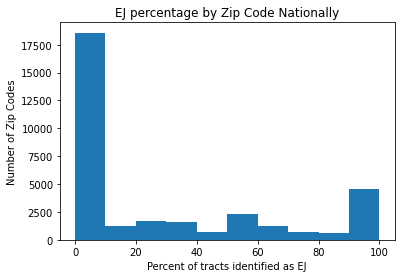

In [6]:
import pyprojroot as ppr
loc = ppr.here('./data/outputs/ZCTA_EJ.csv')
df = pd.read_csv(loc)
histogram(df, titleadd='Nationally')

The below code block will call the above methods to generate a histogram of all csv's within a specified subfolder.

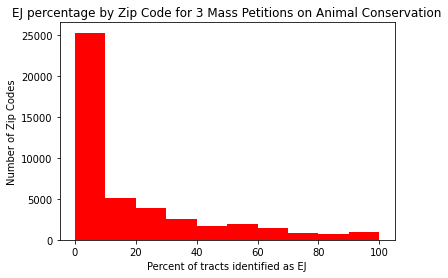

In [19]:
loc = ppr.here('./data/matched/conservation')
df = bigdf(loc)
s = 'for 3 Mass Petitions on Animal Conservation'
histogram(df, titleadd=s, color='Red')

# T test

The below block contains a method to run a t-test on a .csv to determine if there is a statistically significant difference between EJ variables for a given list of zip codes and the nation as a whole. The <code>usepop</code> variable determines the type of t-test to be used. If False, the method uses a student's t-test; if True, the method uses Welch's unequal variance t-test, which is designed to compare sample groups of different populations. The method using Welch's t-test is recommended, as populations differ between zip codes.

In [6]:
import scipy.stats, pandas, pyprojroot

zip_ej = pyprojroot.here('./data/outputs/ZCTA_EJ_special.csv')
usa_df = pandas.read_csv(zip_ej).set_index('Unnamed: 0')

def ttest(loc, usepop=True, col='Identified as disadvantaged'):
    testdf = pyprojroot.here('./data/matched/' + loc)
    a=pandas.read_csv(testdf)[col]
    b=usa_df[col]
    return scipy.stats.ttest_ind(a, b, equal_var=(not usepop), nan_policy='omit')

In [9]:
ttest('EPA-HQ-OAR-2015-0827-4102_attachment_1.csv', col='Traffic proximity and volume (percentile)')

Ttest_indResult(statistic=80.67093367899153, pvalue=0.0)